# Import Libraries

In [2]:
with open('Labels_TargetFeatures.txt') as LabelsName:
    Target = LabelsName.readline().strip()
    Features = LabelsName.readline().split()

# General Sub-Model 

The four sub-models have the same architecture:
1. Feature transformation
2. Feature selection
3. Clustering algorithm
4. Output probabilities

K-Means and Agglomerative Clustering were used as clustering algorithms

In [383]:
import pandas as pd

from sklearn.model_selection import train_test_split

# Loading Dataset
ObesityDataset_Groups = pd.read_csv('../Exploratory_Data_Analysis/ObesityLevel_Groups.csv',index_col=0)
X_features_groups = ObesityDataset_Groups[Features].to_numpy()
y_target_groups = ObesityDataset_Groups[Target].to_numpy()

# Split train-test
X_train , X_test , y_train , y_test = train_test_split(X_features_groups,y_target_groups,test_size=0.2)

<Axes: xlabel='Weight', ylabel='Height'>

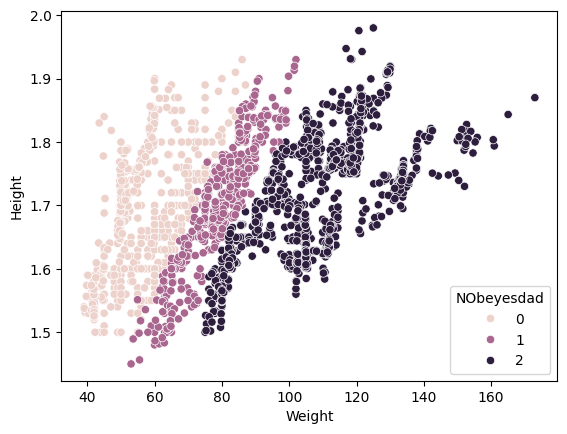

In [382]:
# Expected Result
import seaborn as sns

sns.scatterplot(ObesityDataset_Groups,x='Weight',y='Height',hue='NObeyesdad')

In [374]:
# Base Model

from sklearn.pipeline import Pipeline

from sklearn.feature_selection import mutual_info_classif , SelectPercentile
from sklearn.cluster import KMeans , AgglomerativeClustering

from sklearn.metrics import homogeneity_completeness_v_measure

ScoreFunction_MutualInformation = lambda X,y : mutual_info_classif(X,y,n_neighbors=30)

# Clustering with K-Means
Model_K_Means = Pipeline(steps=[('Feature_Selection',SelectPercentile(score_func=ScoreFunction_MutualInformation,percentile=50)),
                                ('Clustering',KMeans(n_clusters=3))])

# Clustering with Agglomerative Clustering
Model_Agglomerative = Pipeline(steps=[('Feature_Selection',SelectPercentile(score_func=ScoreFunction_MutualInformation,percentile=50)),
                                      ('Clustering',AgglomerativeClustering(n_clusters=3))])

(np.float64(0.2029965059402745),
 np.float64(0.2121067264057111),
 np.float64(0.20745164571930613))

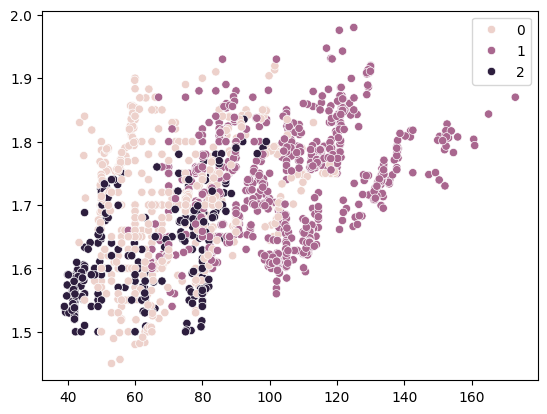

In [464]:
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import KernelPCA

Model_K_Means = Pipeline(steps=[
                                ('Feature_Selection',SelectPercentile(score_func=ScoreFunction_MutualInformation,percentile=50)),
                                ('0',Normalizer()),
                                ('1',KernelPCA(kernel='poly',degree=3,coef0=0)),
                                ('Clustering',KMeans(n_clusters=3)),
                               ])

y_pred = Model_K_Means.fit_predict(X_train,y_train)
sns.scatterplot(x=X_train[:,2],y=X_train[:,1],hue=y_pred)

homogeneity_completeness_v_measure(y_train,y_pred)